Importing necessary data analysis/processing tools

In [1]:
import os
import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

Loading our dataset into a Dataframe `df`.

In [2]:
df = pd.read_csv('FINAL.csv', header = 0)

Inspecting the Data we collected  

1) Size of our dataset
2) Displaying our column names
3) Display first few rows of our data


In [3]:
print(df.shape)
print(df.columns)
df.head(10)


(17673, 62)
Index(['user_id', 'user_win_rate', 'user_lose_rate', 'user_draw_rate',
       'user_game_count', 'user_blitz_rating', 'user_rating_bin',
       'user_white_win_rate', 'user_white_lose_rate', 'user_white_draw_rate',
       'user_white_game_count', 'user_black_win_rate', 'user_black_lose_rate',
       'user_black_draw_rate', 'user_black_game_count', 'user_top_eco',
       'user_second_eco', 'user_top_winrate_eco', 'user_second_winrate_eco',
       'user_mate_winrate', 'user_resign_winrate', 'user_time_winrate',
       'user_mate_lossrate', 'user_resign_lossrate', 'user_time_lossrate',
       'user_average_game_len', 'user_rating_deviation',
       'user_blitz_total_games', 'user_best_win_1', 'user_best_win_2',
       'user_best_win_3', 'op_id', 'op_win_rate', 'op_lose_rate',
       'op_draw_rate', 'op_game_count', 'op_blitz_rating', 'op_white_win_rate',
       'op_white_lose_rate', 'op_white_draw_rate', 'op_white_game_count',
       'op_black_win_rate', 'op_black_lose_rate', 

,user_id,user_win_rate,user_lose_rate,user_draw_rate,user_game_count,user_blitz_rating,user_rating_bin,user_white_win_rate,user_white_lose_rate,user_white_draw_rate,user_white_game_count,user_black_win_rate,user_black_lose_rate,user_black_draw_rate,user_black_game_count,user_top_eco,user_second_eco,user_top_winrate_eco,user_second_winrate_eco,user_mate_winrate,user_resign_winrate,user_time_winrate,user_mate_lossrate,user_resign_lossrate,user_time_lossrate,user_average_game_len,user_rating_deviation,user_blitz_total_games,user_best_win_1,user_best_win_2,user_best_win_3,op_id,op_win_rate,op_lose_rate,op_draw_rate,op_game_count,op_blitz_rating,op_white_win_rate,op_white_lose_rate,op_white_draw_rate,op_white_game_count,op_black_win_rate,op_black_lose_rate,op_black_draw_rate,op_black_game_count,op_top_eco,op_second_eco,op_top_winrate_eco,op_second_winrate_eco,op_mate_winrate,op_resign_winrate,op_time_winrate,op_mate_lossrate,op_resign_lossrate,op_time_lossrate,op_average_game_len,op_rating_deviation,op_blitz_total_games,op_best_win_1,op_best_win_2,op_best_win_3,game_result
0,kamal_balaiannnnn,50.0,48.0,2.0,100.0,1077.0,1060-1079,47.692,50.769,1.538,65.0,43.333,55.000,1.667,60.0,C40,C34,B12,A45,0.386,0.439,0.158,0.545,0.167,0.258,367.0,56.63,422.0,1220.0,1205.0,1202.0,TIMFAKS,54.0,39.0,7.0,100.0,1119.0,45.161,48.387,6.452,62.0,47.619,47.619,4.762,63.0,C42,C50,D20,C55,0.379,0.414,0.172,0.433,0.167,0.400,272.0,45.28,1984.0,1412.0,1410.0,1390.0,-1.0
1,jenzetti,48.0,49.0,3.0,100.0,1359.0,1340-1359,51.562,45.312,3.125,64.0,45.902,54.098,0.000,61.0,C50,B28,A13,C40,0.328,0.475,0.197,0.355,0.290,0.355,388.0,45.00,2010.0,1517.0,1512.0,1500.0,Amisree,48.0,49.0,3.0,100.0,1354.0,56.452,38.710,4.839,62.0,42.857,57.143,0.000,63.0,C41,C23,C20,C01,0.161,0.516,0.242,0.633,0.000,0.350,381.0,78.88,208.0,1460.0,1445.0,1440.0,-1.0
2,hermar,47.0,51.0,2.0,100.0,1609.0,1600-1619,50.000,48.333,1.667,60.0,44.615,46.154,9.231,65.0,D02,A40,D11,C40,0.271,0.525,0.203,0.203,0.407,0.390,379.0,49.82,1582.0,1729.0,1704.0,1687.0,Rufusikik9999,57.0,36.0,6.0,100.0,1603.0,48.438,45.312,6.250,64.0,50.820,42.623,6.557,61.0,C44,C50,B32,C72,0.355,0.435,0.210,0.327,0.491,0.145,410.0,46.78,1023.0,1624.0,1618.0,1616.0,-1.0
3,HakobN,53.0,43.0,4.0,100.0,2379.0,2360-2379,59.375,32.812,7.812,64.0,45.902,45.902,8.197,61.0,B23,B00,A02,D04,0.197,0.636,0.167,0.245,0.714,0.041,277.0,46.15,7861.0,2782.0,2665.0,2664.0,NikolaDubovik,51.0,37.0,12.0,100.0,2088.0,50.820,37.705,11.475,61.0,42.188,48.438,9.375,64.0,B00,A02,A00,C31,0.345,0.310,0.293,0.444,0.444,0.111,253.0,47.09,16413.0,2710.0,2700.0,2697.0,1.0
4,Castillo123458789102,28.0,65.0,6.0,100.0,1057.0,1040-1059,30.357,58.929,10.714,56.0,44.928,44.928,10.145,69.0,B01,A40,A48,A09,0.375,0.375,0.208,0.281,0.547,0.141,329.0,52.74,671.0,1227.0,1216.0,1198.0,Bauti_Bomben,45.0,48.0,7.0,100.0,1063.0,57.143,38.095,4.762,63.0,43.548,50.000,6.452,62.0,C20,C41,C70,B50,0.349,0.302,0.333,0.345,0.418,0.236,358.0,45.23,2899.0,1823.0,1503.0,1456.0,-1.0
5,anacondaismypet,48.0,46.0,6.0,100.0,2235.0,2220-2239,53.226,38.710,8.065,62.0,53.968,42.857,3.175,63.0,D10,C02,C05,E26,0.179,0.627,0.194,0.216,0.647,0.137,448.0,46.97,799.0,2357.0,2350.0,2340.0,LomakinaGV,56.0,39.0,4.0,100.0,2125.0,60.317,36.508,3.175,63.0,48.387,43.548,8.065,62.0,A05,A04,A00,A45,0.088,0.618,0.279,0.120,0.540,0.340,413.0,45.06,9781.0,2313.0,2309.0,2296.0,1.0
6,Julio2019,25.0,73.0,2.0,100.0,1609.0,1600-1619,30.159,66.667,3.175,63.0,30.645,69.355,0.000,62.0,D00,B00,D30,A03,0.053,0.211,0.605,0.329,0.447,0.082,290.0,45.05,7457.0,2362.0,2341.0,2327.0,Remigio2023,44.0,52.0,4.0,100.0,1905.0,54.098,36.066,9.836,61.0,48.438,46.875,4.688,64.0,A06,A04,C42,D02,0.266,0.328,0.391,0.077,0.558,0.327,282.0,45.03,10470.0,2524.0,2418.0,2393.0,-1.0
7,kapri8,61.0,37.0,2.0,100.0,1213.0,1200-1219,57.377,37.705,4.918,61.0,51.562,48.438,0.000,64.0,B01,D00,C02,A03,0.309,0.529,0.132,0.111,0.852,0.019,449.0,45.30,1153.0,1336.0,1323.0,1320.0,ufyljybot,48.0,43.0,9.0,100.0,1366.0,40.678,49.153,10.169,59.0,48.485,43.9

Identifying missingness: If we have 0 in game_count for a user, we have missing values and should drop it

In [4]:
zero_count = (df == 0).sum()
zero_count

user_id                       0
user_win_rate               762
user_lose_rate              373
user_draw_rate             4194
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate         386
user_white_lose_rate        189
user_white_draw_rate       2945
user_white_game_count       127
user_black_win_rate         403
user_black_lose_rate        188
user_black_draw_rate       2930
user_black_game_count       131
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate           520
user_resign_winrate         513
user_time_winrate           703
user_mate_lossrate          421
user_resign_lossrate        635
user_time_lossrate         1238
user_average_game_len        58
user_rating_deviation         0
user_blitz_total_games       20
user_best_win_1             633
user_best_win_2             633
user_best_win_3             633
op_id   

In [5]:
df = df.dropna()
game_counts = [
    'user_game_count',
    'op_game_count',
    'user_blitz_total_games',
    'op_blitz_total_games'
]
for column in game_counts:
    df = df[df[column] >= 10]
    


We can see that there are many fields that contain 0 values. For some columns, we know that having a significant number of 0 values in their columns is a bad sign because when the lichess api breaks sometimes it imputs all 0's into the dataset. We should drop some of the rows containing the these values. For observation purposes we will draw out a few plots before cleaning the data.

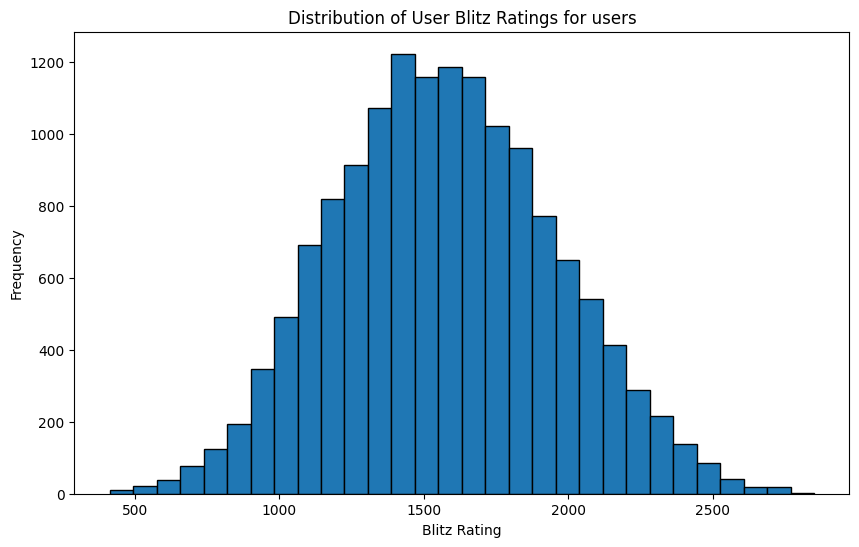

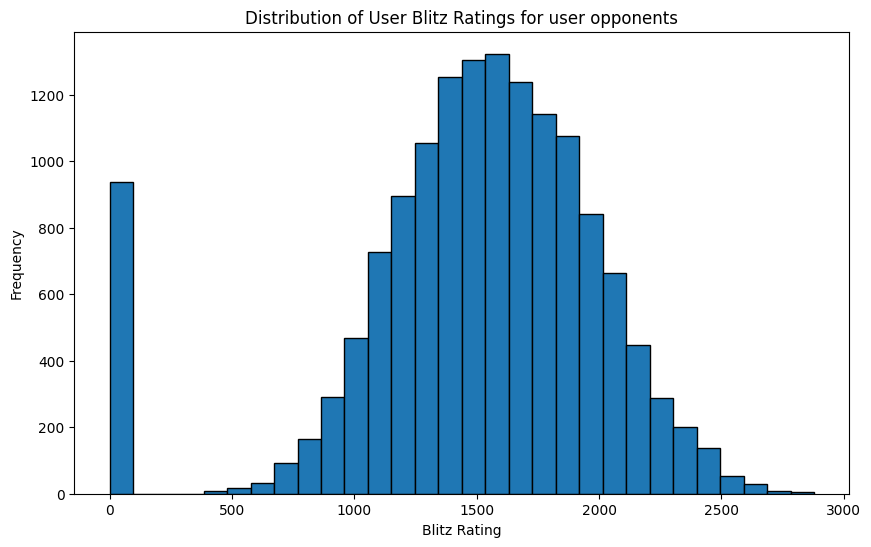

In [6]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

In [7]:
df.shape

(14692, 62)

In [8]:
game_0s = [
    'user_win_rate',
    'user_lose_rate',
    'user_mate_winrate',
    'user_mate_lossrate',
    'op_win_rate',
    'op_lose_rate',
    'op_mate_winrate',
    'op_mate_lossrate',
    'op_blitz_rating'
    
]
for column in game_0s:
    df = df[df[column] != 0]
 

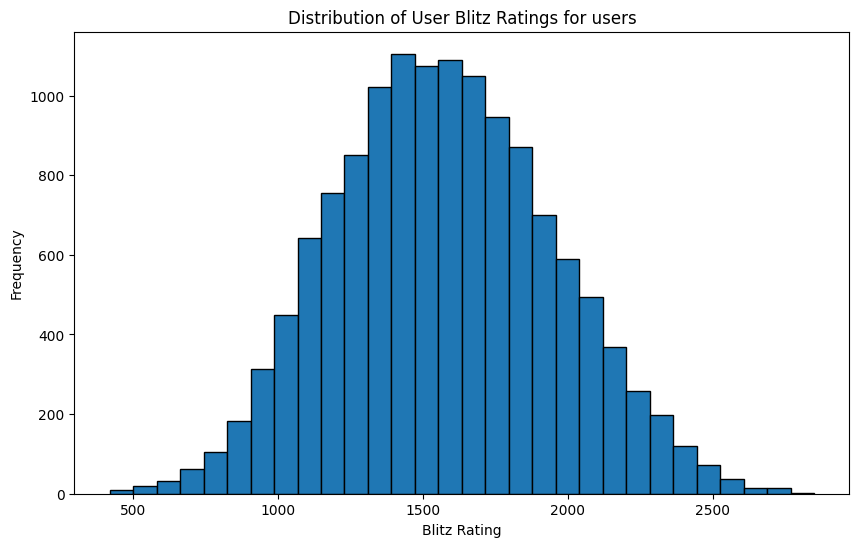

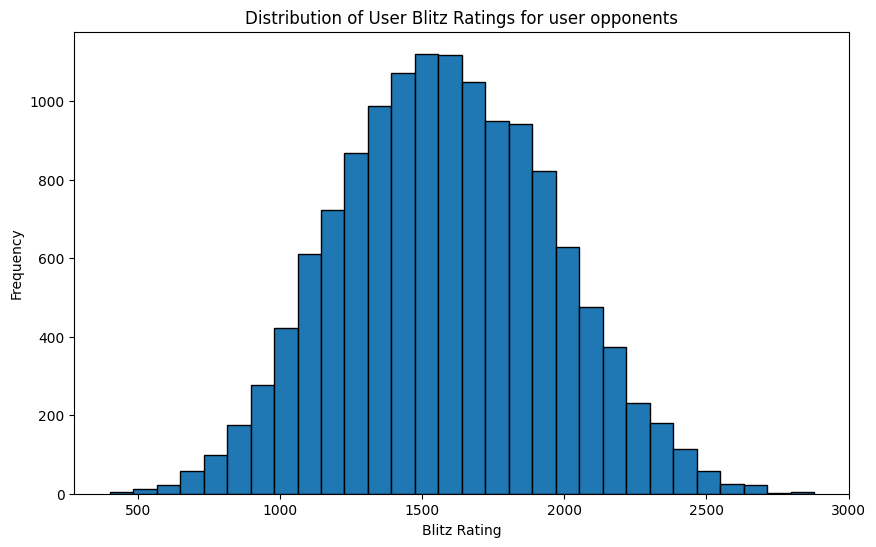

In [9]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

In [10]:
print(df.shape)
zero_count = (df == 0).sum()
print(zero_count)

(13450, 62)
user_id                       0
user_win_rate                 0
user_lose_rate                0
user_draw_rate             1963
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate           7
user_white_lose_rate          1
user_white_draw_rate       1746
user_white_game_count         0
user_black_win_rate          10
user_black_lose_rate          1
user_black_draw_rate       1683
user_black_game_count         0
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate             0
user_resign_winrate          42
user_time_winrate            85
user_mate_lossrate            0
user_resign_lossrate        245
user_time_lossrate          594
user_average_game_len         0
user_rating_deviation         0
user_blitz_total_games        0
user_best_win_1              85
user_best_win_2              85
user_best_win_3             

In [11]:
best_games = [
    'op_best_win_1',
    'op_best_win_2',
    'op_best_win_3',
    'user_best_win_1',
    'user_best_win_2',
    'user_best_win_3'
    
]
for column in game_0s:
    df = df[df[column] != 0]

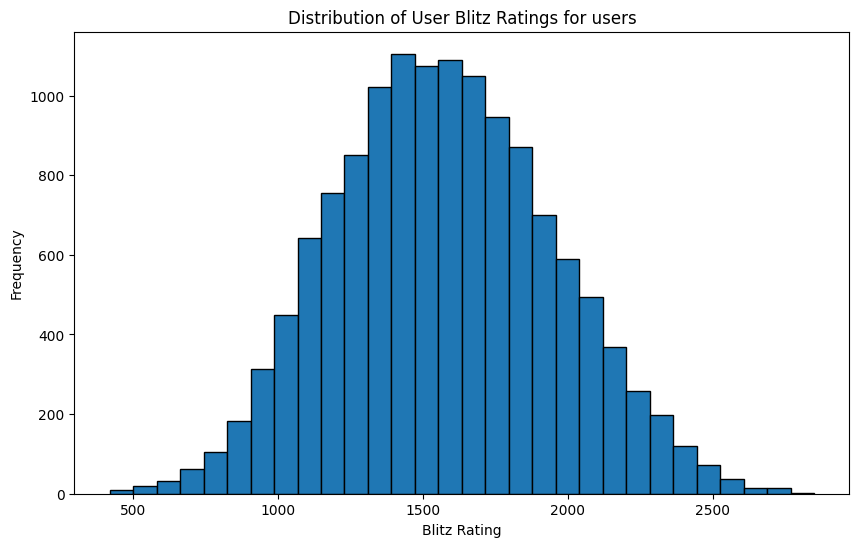

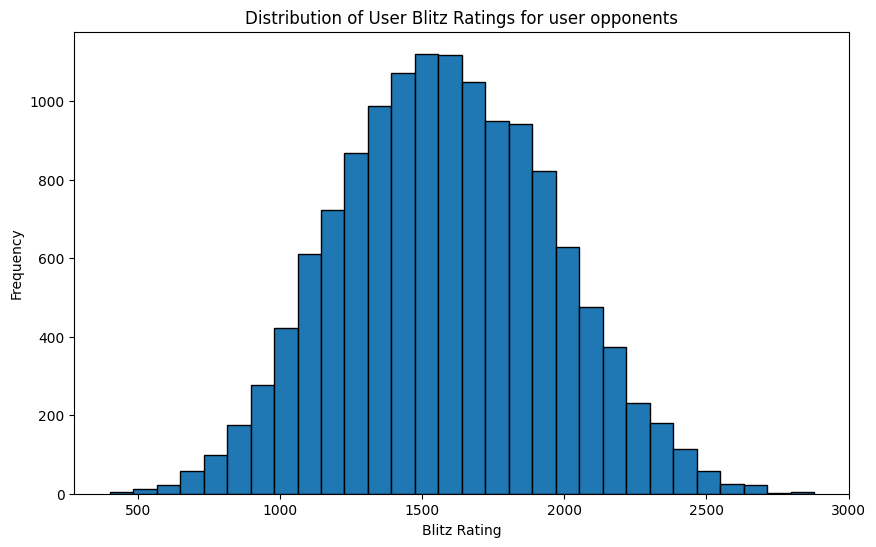

In [12]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
columns_to_encode = ['user_top_eco', 'user_second_eco', 'user_top_winrate_eco', 'user_second_winrate_eco', 'op_top_eco', 'op_second_eco', 'op_top_winrate_eco', 'op_second_winrate_eco']
  
# Initialize the label encoder
label_encoders = {}

# Perform label encoding
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Save the encoded data to a new CSV file (optional)

df.head(10)

,user_id,user_win_rate,user_lose_rate,user_draw_rate,user_game_count,user_blitz_rating,user_rating_bin,user_white_win_rate,user_white_lose_rate,user_white_draw_rate,user_white_game_count,user_black_win_rate,user_black_lose_rate,user_black_draw_rate,user_black_game_count,user_top_eco,user_second_eco,user_top_winrate_eco,user_second_winrate_eco,user_mate_winrate,user_resign_winrate,user_time_winrate,user_mate_lossrate,user_resign_lossrate,user_time_lossrate,user_average_game_len,user_rating_deviation,user_blitz_total_games,user_best_win_1,user_best_win_2,user_best_win_3,op_id,op_win_rate,op_lose_rate,op_draw_rate,op_game_count,op_blitz_rating,op_white_win_rate,op_white_lose_rate,op_white_draw_rate,op_white_game_count,op_black_win_rate,op_black_lose_rate,op_black_draw_rate,op_black_game_count,op_top_eco,op_second_eco,op_top_winrate_eco,op_second_winrate_eco,op_mate_winrate,op_resign_winrate,op_time_winrate,op_mate_lossrate,op_resign_lossrate,op_time_lossrate,op_average_game_len,op_rating_deviation,op_blitz_total_games,op_best_win_1,op_best_win_2,op_best_win_3,game_result
0,kamal_balaiannnnn,50.0,48.0,2.0,100.0,1077.0,1060-1079,47.692,50.769,1.538,65.0,43.333,55.000,1.667,60.0,85,107,94,43,0.386,0.439,0.158,0.545,0.167,0.258,367.0,56.63,422.0,1220.0,1205.0,1202.0,TIMFAKS,54.0,39.0,7.0,100.0,1119.0,45.161,48.387,6.452,62.0,47.619,47.619,4.762,63.0,92,122,267,221,0.379,0.414,0.172,0.433,0.167,0.400,272.0,45.28,1984.0,1412.0,1410.0,1390.0,-1.0
1,jenzetti,48.0,49.0,3.0,100.0,1359.0,1340-1359,51.562,45.312,3.125,64.0,45.902,54.098,0.000,61.0,95,61,13,198,0.328,0.475,0.197,0.355,0.290,0.355,388.0,45.00,2010.0,1517.0,1512.0,1500.0,Amisree,48.0,49.0,3.0,100.0,1354.0,56.452,38.710,4.839,62.0,42.857,57.143,0.000,63.0,91,103,180,168,0.161,0.516,0.242,0.633,0.000,0.350,381.0,78.88,208.0,1460.0,1445.0,1440.0,-1.0
2,hermar,47.0,51.0,2.0,100.0,1609.0,1600-1619,50.000,48.333,1.667,60.0,44.615,46.154,9.231,65.0,116,25,263,198,0.271,0.525,0.203,0.203,0.407,0.390,379.0,49.82,1582.0,1729.0,1704.0,1687.0,Rufusikik9999,57.0,36.0,6.0,100.0,1603.0,48.438,45.312,6.250,64.0,50.820,42.623,6.557,61.0,93,122,110,238,0.355,0.435,0.210,0.327,0.491,0.145,410.0,46.78,1023.0,1624.0,1618.0,1616.0,-1.0
3,HakobN,53.0,43.0,4.0,100.0,2379.0,2360-2379,59.375,32.812,7.812,64.0,45.902,45.902,8.197,61.0,45,41,2,247,0.197,0.636,0.167,0.245,0.714,0.041,277.0,46.15,7861.0,2782.0,2665.0,2664.0,NikolaDubovik,51.0,37.0,12.0,100.0,2088.0,50.820,37.705,11.475,61.0,42.188,48.438,9.375,64.0,35,2,0,198,0.345,0.310,0.293,0.444,0.444,0.111,253.0,47.09,16413.0,2710.0,2700.0,2697.0,1.0
4,Castillo123458789102,28.0,65.0,6.0,100.0,1057.0,1040-1059,30.357,58.929,10.714,56.0,44.928,44.928,10.145,69.0,32,25,48,9,0.375,0.375,0.208,0.281,0.547,0.141,329.0,52.74,671.0,1227.0,1216.0,1198.0,Bauti_Bomben,45.0,48.0,7.0,100.0,1063.0,57.143,38.095,4.762,63.0,43.548,50.000,6.452,62.0,78,113,230,131,0.349,0.302,0.333,0.345,0.418,0.236,358.0,45.23,2899.0,1823.0,1503.0,1456.0,-1.0
5,anacondaismypet,48.0,46.0,6.0,100.0,2235.0,2220-2239,53.226,38.710,8.065,62.0,53.968,42.857,3.175,63.0,120,90,172,337,0.179,0.627,0.194,0.216,0.647,0.137,448.0,46.97,799.0,2357.0,2350.0,2340.0,LomakinaGV,56.0,39.0,4.0,100.0,2125.0,60.317,36.508,3.175,63.0,48.387,43.548,8.065,62.0,5,4,0,45,0.088,0.618,0.279,0.120,0.540,0.340,413.0,45.06,9781.0,2313.0,2309.0,2296.0,1.0
6,Julio2019,25.0,73.0,2.0,100.0,1609.0,1600-1619,30.159,66.667,3.175,63.0,30.645,69.355,0.000,62.0,114,41,279,3,0.053,0.211,0.605,0.329,0.447,0.082,290.0,45.05,7457.0,2362.0,2341.0,2327.0,Remigio2023,44.0,52.0,4.0,100.0,1905.0,54.098,36.066,9.836,61.0,48.438,46.875,4.688,64.0,6,4,202,253,0.266,0.328,0.391,0.077,0.558,0.327,282.0,45.03,10470.0,2524.0,2418.0,2393.0,-1.0
7,kapri8,61.0,37.0,2.0,100.0,1213.0,1200-1219,57.377,37.705,4.918,61.0,51.562,48.438,0.000,64.0,32,140,169,3,0.309,0.529,0.132,0.111,0.852,0.019,449.0,45.30,1153.0,1336.0,1323.0,1320.0,ufyljybot,48.0,43.0,9.0,100.0,1366.0,40.678,49.153,10.169,59.0,48.485,43.939,7.576,66.0,115,91,13,207,0.214,0.518,0.1

We can see that the distribution is quite similar. In particular we have spikes in fetching users with ratings of around 1500. In addition it seems we have some outliers in out data.

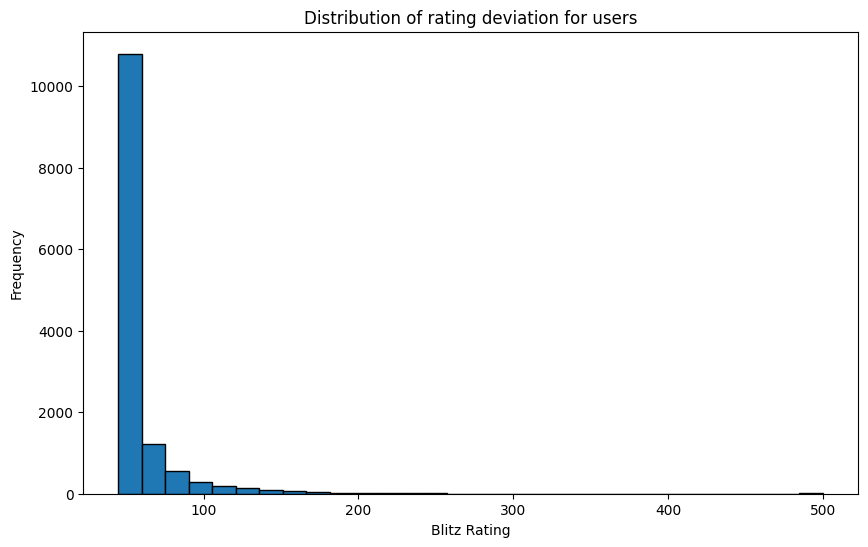

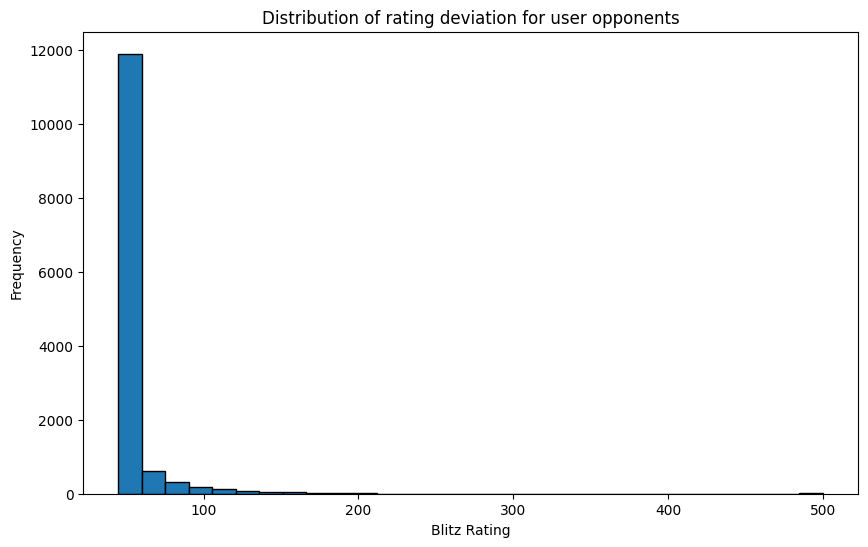

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['user_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

When the rating deviation is around 45, we know the user has a relatively stable rating, from the graph we can see that most users in our dataset has a stable rating. The only thing we have to consider is the outliers of rating deviation at 0 and at 500. These data points will be dropped.

Now for some actual data cleaning.

1) Remove null values.
2) Remove all games, and sub-categories of the games that have counts of 0.
3) If the total number of games played by a user is less than 10, they aren't active enough in the game time control style. Thus they will be removed too.
4) Rating deviation outliers will be removed.

Lets re-visualize our data now

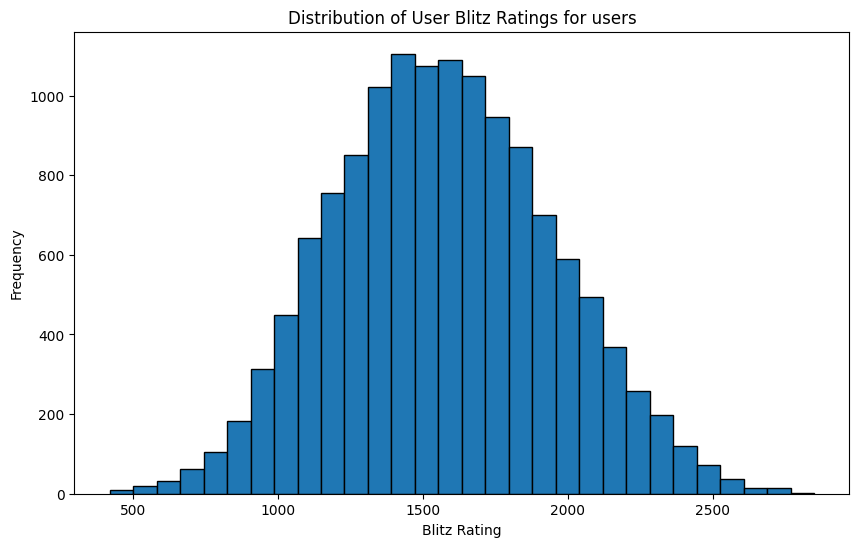

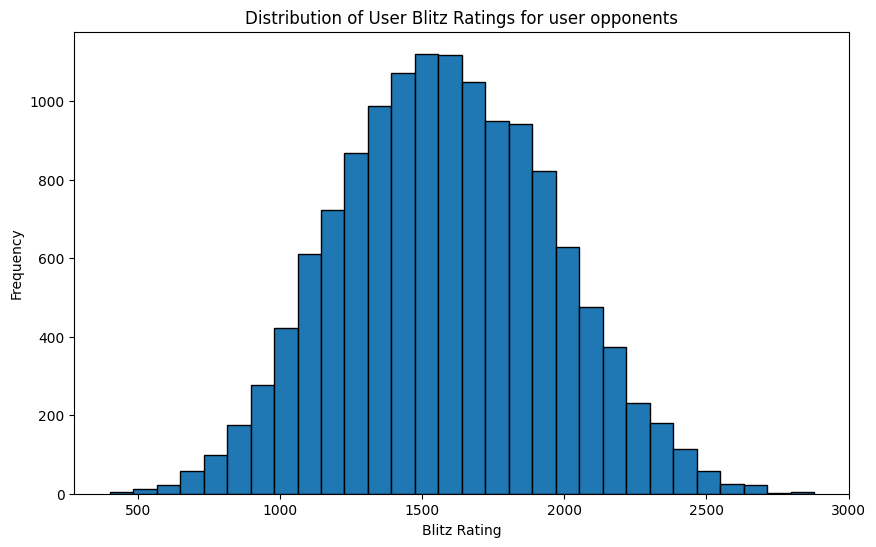

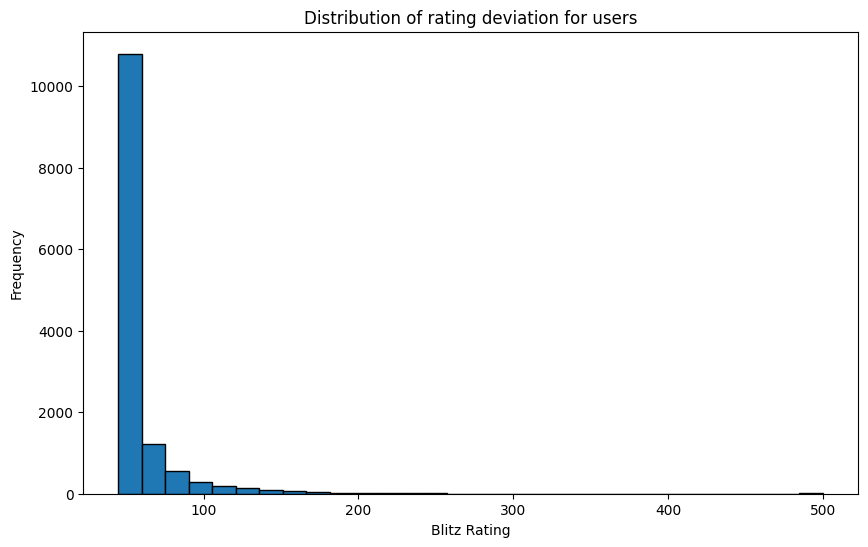

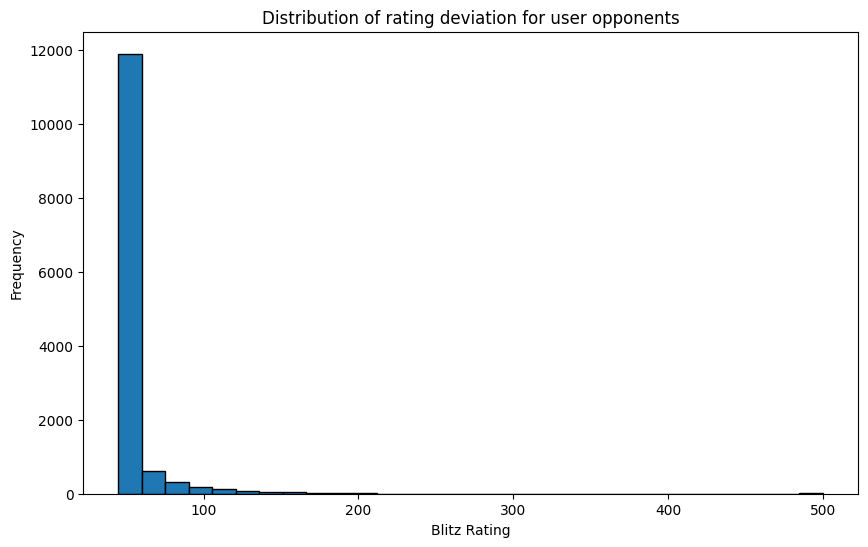

In [15]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['user_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

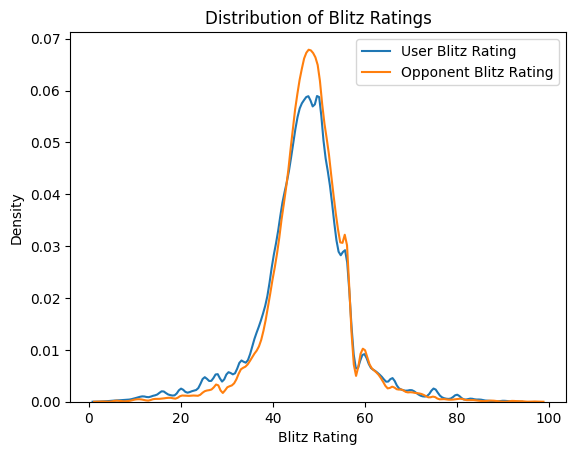

In [16]:
sns.kdeplot(df['user_win_rate'], label='User Blitz Rating', bw_adjust=0.5)
sns.kdeplot(df['op_win_rate'], label='Opponent Blitz Rating', bw_adjust=0.5)

# Add more columns as needed
# sns.kdeplot(df['another_column'], label='Another Rating', bw_adjust=0.5)

# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

This indicates that indeed for the most part, players are matched against players in their own rating bracket so our data collection was effective.

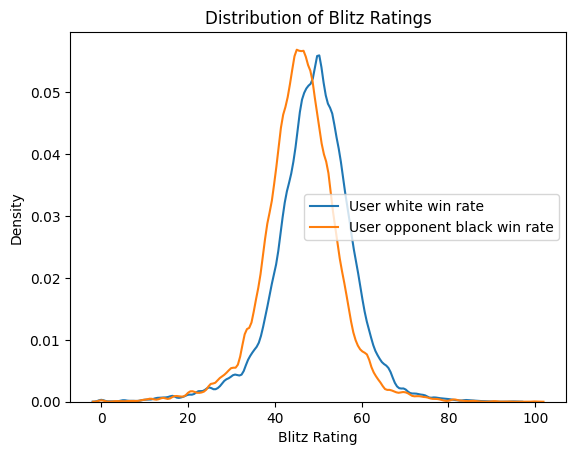

In [17]:
sns.kdeplot(df['user_white_win_rate'], label='User white win rate', bw_adjust=0.5)
sns.kdeplot(df['op_black_win_rate'], label='User opponent black win rate', bw_adjust=0.5)


# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

Seems that players playing white has a higher win rate than those playing black.

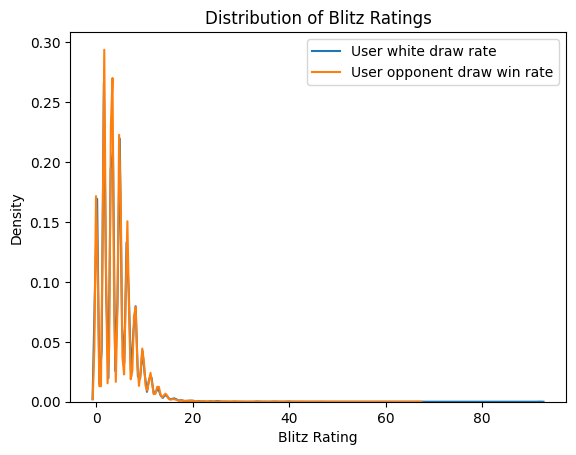

In [18]:
sns.kdeplot(df['user_white_draw_rate'], label='User white draw rate', bw_adjust=0.5)
sns.kdeplot(df['op_black_draw_rate'], label='User opponent draw win rate', bw_adjust=0.5)


# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

Seems like the draw rate is the same, so it is probably safe to say that players playing either color have an equal chance of drawing.

In [19]:
df['op_average_best_win'] = df[['op_best_win_1', 'op_best_win_2', 'op_best_win_3']].mean(axis=1)
df['user_average_best_win'] = df[['user_best_win_1', 'user_best_win_2', 'user_best_win_3']].mean(axis=1)

In [20]:
#Feature engineering: 

def check_user_in_op_winrate(row):
    """Check if user's top two ECOs are in opponent's top winrate ECOs."""
    user_eco_set = {row['user_top_eco'], row['user_second_eco']}
    op_winrate_eco_set = {row['op_top_winrate_eco'], row['op_second_winrate_eco']}
    # print('User eco set:', user_eco_set)
    # print('op_winrate_eco_set', op_winrate_eco_set)
    # print('Storing', int(bool(user_eco_set & op_winrate_eco_set)))
    return int(bool(user_eco_set & op_winrate_eco_set))  # Intersection check

def check_op_in_user_winrate(row):
    """Check if opponent's top two ECOs are in user's top winrate ECOs."""
    op_eco_set = {row['op_top_eco'], row['op_second_eco']}
    user_winrate_eco_set = {row['user_top_winrate_eco'], row['user_second_winrate_eco']}
    return int(bool(op_eco_set & user_winrate_eco_set))  # Intersection check

# Apply functions to create new features
df['user_eco_in_op_winrate'] = df.apply(check_user_in_op_winrate, axis=1)
df['op_eco_in_user_winrate'] = df.apply(check_op_in_user_winrate, axis=1)


In [21]:
df['user_white_performance'] = df['user_white_win_rate'] * (1- df['op_black_lose_rate'])
df['user_black_performance'] = df['user_black_win_rate'] * (1- df['op_white_lose_rate'])
df['op_white_performance'] = df['op_white_win_rate'] * (1- df['user_black_lose_rate'])
df['op_black_performance'] = df['op_black_win_rate'] * (1- df['user_white_lose_rate'])


In [22]:
df['high_draw_rate'] = ((df['user_draw_rate'] > 0.06) & (df['op_draw_rate'] > 0.06)).astype(int)

In [23]:
df['user_time_performance'] = df['user_time_winrate'] * df['op_time_lossrate']
df['op_time_performance'] = df['op_time_winrate'] * df['user_time_lossrate']

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 13450 entries, 0 to 17670
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_win_rate           13450 non-null  float64
 1   user_lose_rate          13450 non-null  float64
 2   user_game_count         13450 non-null  float64
 3   user_blitz_rating       13450 non-null  float64
 4   user_white_performance  13450 non-null  float64
 5   user_black_performance  13450 non-null  float64
 6   user_white_draw_rate    13450 non-null  float64
 7   user_white_game_count   13450 non-null  float64
 8   user_black_draw_rate    13450 non-null  float64
 9   user_black_game_count   13450 non-null  float64
 10  user_eco_in_op_winrate  13450 non-null  int64  
 11  user_mate_winrate       13450 non-null  float64
 12  user_resign_winrate     13450 non-null  float64
 13  user_time_performance   13450 non-null  float64
 14  user_mate_lossrate      

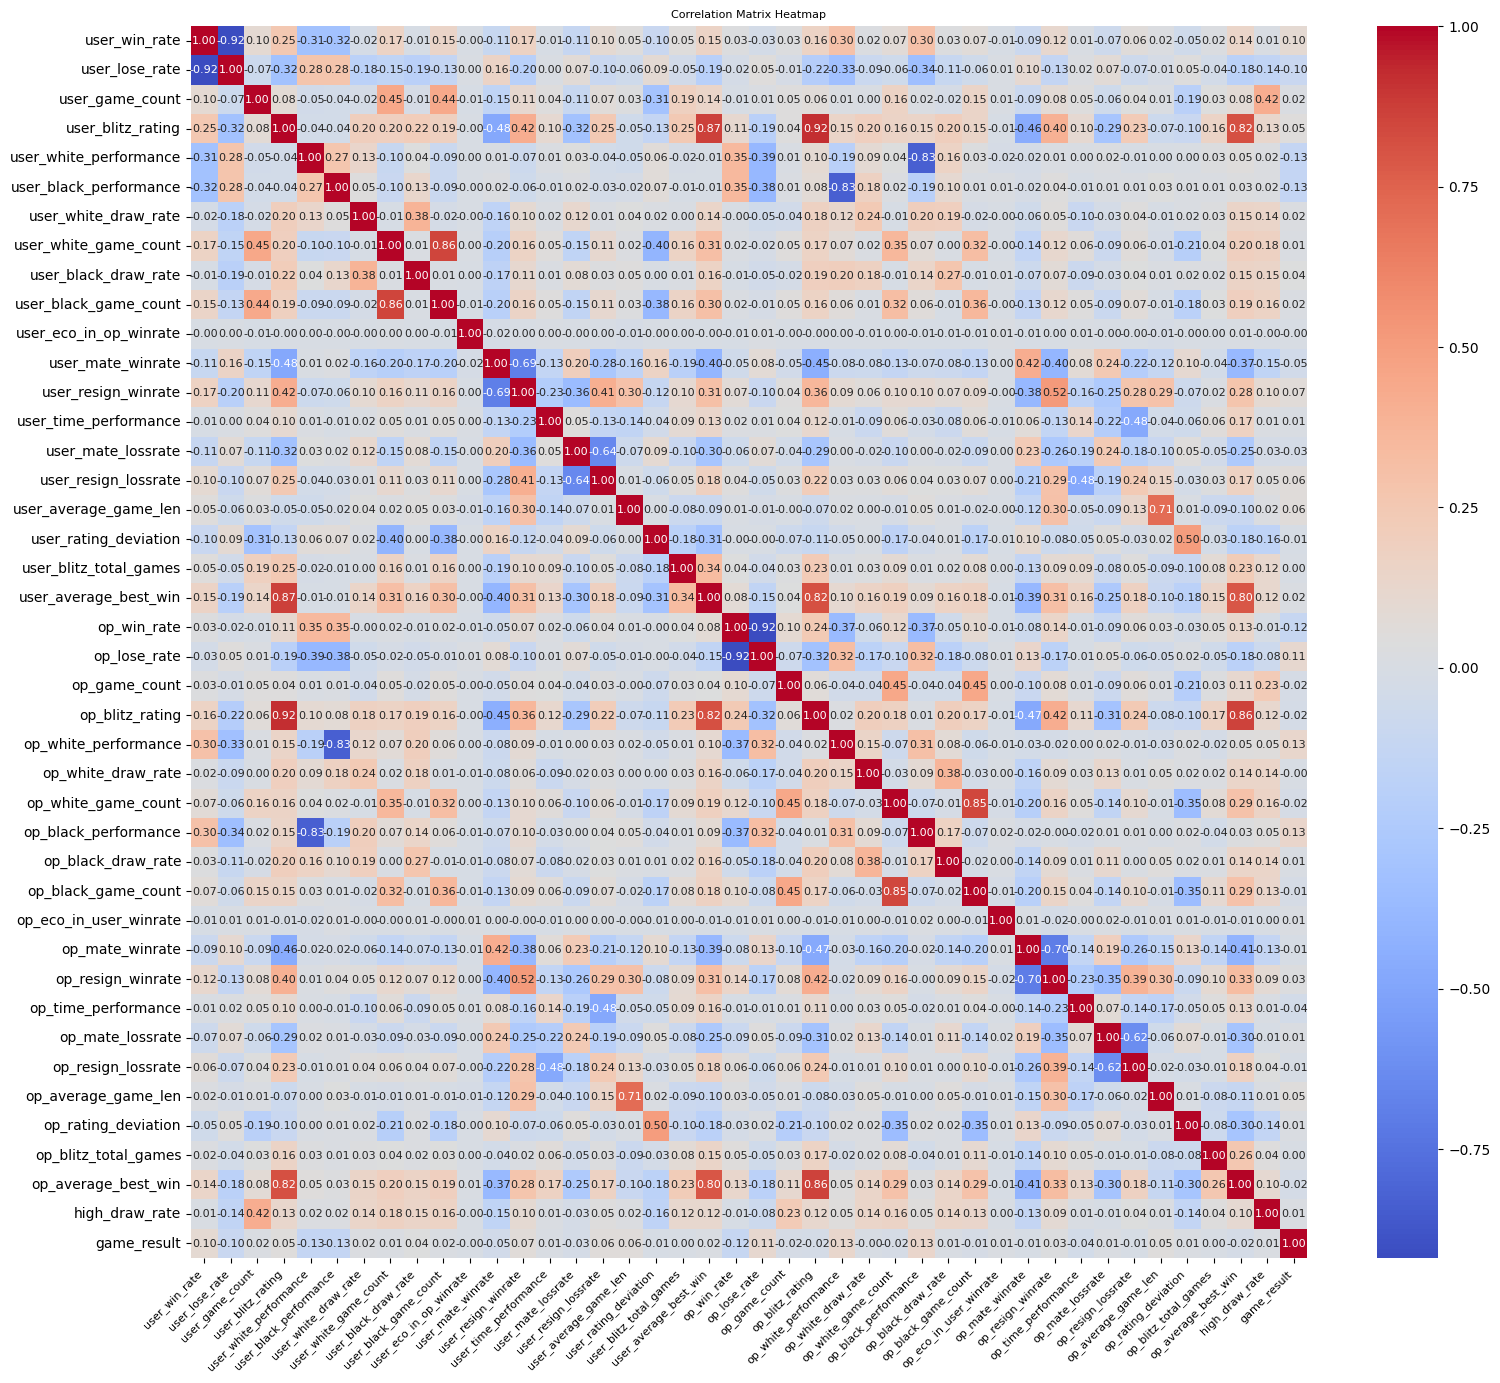

In [24]:
relevant_features = [
    'user_win_rate', 'user_lose_rate', 'user_game_count', 'user_blitz_rating', 'user_white_performance', 'user_black_performance',
    'user_white_draw_rate',	'user_white_game_count', 'user_black_draw_rate',
    'user_black_game_count', 'user_eco_in_op_winrate', 'user_mate_winrate',	'user_resign_winrate',
    'user_time_performance', 'user_mate_lossrate', 'user_resign_lossrate', 'user_average_game_len', 'user_rating_deviation',
    'user_blitz_total_games', 'user_average_best_win', 'op_win_rate', 'op_lose_rate',
    'op_game_count', 'op_blitz_rating',	'op_white_performance', 'op_white_draw_rate','op_white_game_count', 'op_black_performance',
  'op_black_draw_rate',	'op_black_game_count', 'op_eco_in_user_winrate',
    'op_mate_winrate', 'op_resign_winrate', 'op_time_performance', 'op_mate_lossrate', 'op_resign_lossrate', 'op_average_game_len', 'op_rating_deviation',
    'op_blitz_total_games', 'op_average_best_win', 'high_draw_rate', 'game_result'
]
df_relevant = df[relevant_features]
# Display basic information about the relevant data
print("Basic Information:")
print(df_relevant.info())
print("\n")

# Generate summary statistics for numerical columns
print("Summary Statistics:")
print(df_relevant.describe())
print("\n")

# Calculate average for each numerical column
averages = df_relevant.mean()
print("Averages for each column:")
print(averages)
print("\n")

# Generate correlation matrix for the dataset
correlation_matrix = df_relevant.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Display the correlation matrix as a heatmap with better readability
plt.figure(figsize=(18, 16))  # Increase figure size for readability
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 8}  # Set annotation font size
)

# Rotate labels for readability
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, fontsize=10)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=8)

# Show the plot
plt.show()

Checking correlation between features. If there's high correlation, we drop them becuase they likely contribute the same type of info.

For this intermediate report we haven't gotten to analyzing correlated features to drop yet, but we plan to.

In [25]:
df_relevant.to_csv('cleaned.csv', index = False)

Features with an absolute correlation greater than 0.05 with 'game_result':
user_white_performance   -0.131235
op_black_performance      0.130891
op_white_performance      0.127739
user_black_performance   -0.125375
op_win_rate              -0.116489
op_lose_rate              0.112107
user_lose_rate           -0.102557
user_win_rate             0.095794
user_resign_winrate       0.066483
user_average_game_len     0.058867
user_resign_lossrate      0.057510
user_blitz_rating         0.053483
op_average_game_len       0.050307
Name: game_result, dtype: float64


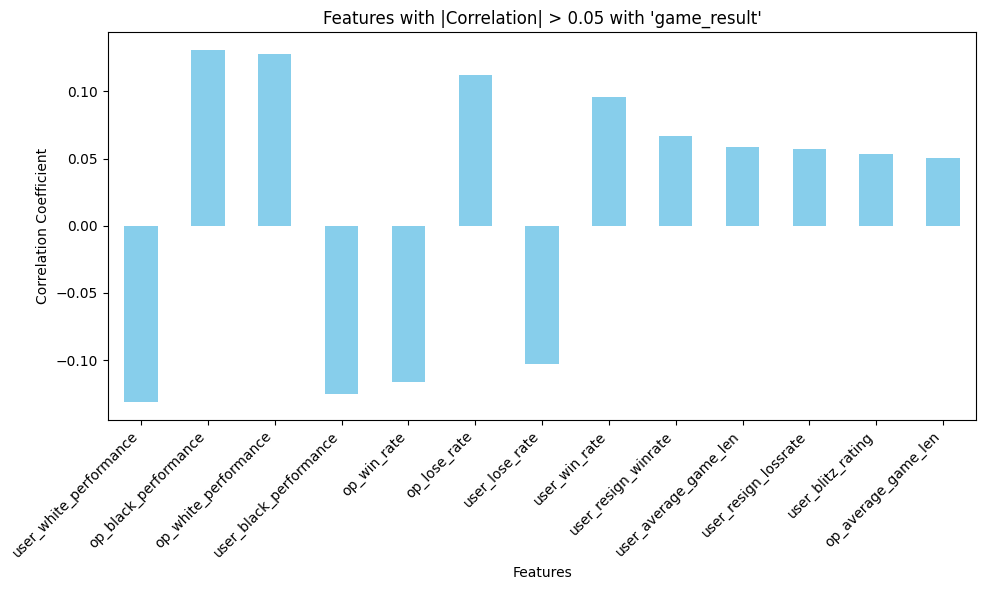

Filtered features saved to 'filtered_features.csv'


In [35]:

# Specify the label column
label_col = 'game_result'  # Replace 'label' with your actual label column name

# Check if the label column exists in the dataframe
if label_col not in df_relevant.columns:
    raise ValueError(f"Label column '{label_col}' not found in the dataframe.")

# Compute the correlation of all features with the label
corr_with_label = correlation_matrix[label_col].drop(labels=[label_col])  # Exclude self-correlation

# Filter features with absolute correlation greater than 0.10
threshold = 0.05
strong_corr = corr_with_label[abs(corr_with_label) > threshold]

# Sort the features by absolute correlation in descending order
strong_corr_sorted = strong_corr.reindex(strong_corr.abs().sort_values(ascending=False).index)

# Print the strong correlations
print(f"Features with an absolute correlation greater than {threshold} with '{label_col}':")
print(strong_corr_sorted)

# Optional: Visualize the strong correlations with a bar plot
plt.figure(figsize=(10, 6))
strong_corr_sorted.plot(kind='bar', color='skyblue')
plt.title(f"Features with |Correlation| > {threshold} with '{label_col}'")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

strong_features = strong_corr_sorted.index.tolist()
df_filtered = df[strong_features + [label_col]]

# Save the filtered DataFrame to a new CSV file
output_csv = 'filtered_features.csv'
df_filtered.to_csv(output_csv, index=False)
print(f"Filtered features saved to '{output_csv}'")

Our first model: KNN

In [36]:
import pandas as pd
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv('filtered_features.csv')

# our features
X = data.drop(columns=['game_result'])
X = X.select_dtypes(include=['number'])


#our label
y = data['game_result']   # the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [100, 130, 150, 170, 190],          # Two choices for number of neighbors
    'weights': ['uniform', 'distance']  # Two choices for weighting
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Best Parameters: {'n_neighbors': 190, 'weights': 'distance'}
Accuracy with Best Parameters: 0.5608088016651799


Our Second Model: Random Forest

In [37]:
import pandas as pd
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv('filtered_features.csv')

# our features
X = data.drop(columns=['game_result'])
X = X.select_dtypes(include=['number'])


#our label
y = data['game_result']   # the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the KNN model
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [ 300, 400, 500],  # Number of trees in the forest
    'max_depth': [10, 12, 15, 20]       # Maximum depth of the trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Accuracy with Best Parameters: 0.5768658935474279


In [38]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('filtered_features.csv')

# Features and label
X = data.drop(columns=['game_result'])
X = X.select_dtypes(include=['number'])  # Keep only numeric columns
y = data['game_result']  # Assuming the last column is the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [ (100,), (100, 50), (150, 100, 50), (100, 75, 35)],
    'activation': ['tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [.01, .001],
    'learning_rate': ['constant'],
    'max_iter': [2000],
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='accuracy',  # Use accuracy as the metric
    verbose=2,
    n_jobs=4           
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print accuracy and classification report
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}

Accuracy on test set: 0.5646743978590544

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.57      0.87      0.69      1845
         0.0       0.00      0.00      0.00       134
         1.0       0.52      0.21      0.30      1384

    accuracy                           0.56      3363
   macro avg       0.36      0.36      0.33      3363
weighted avg       0.53      0.56      0.50      3363



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
